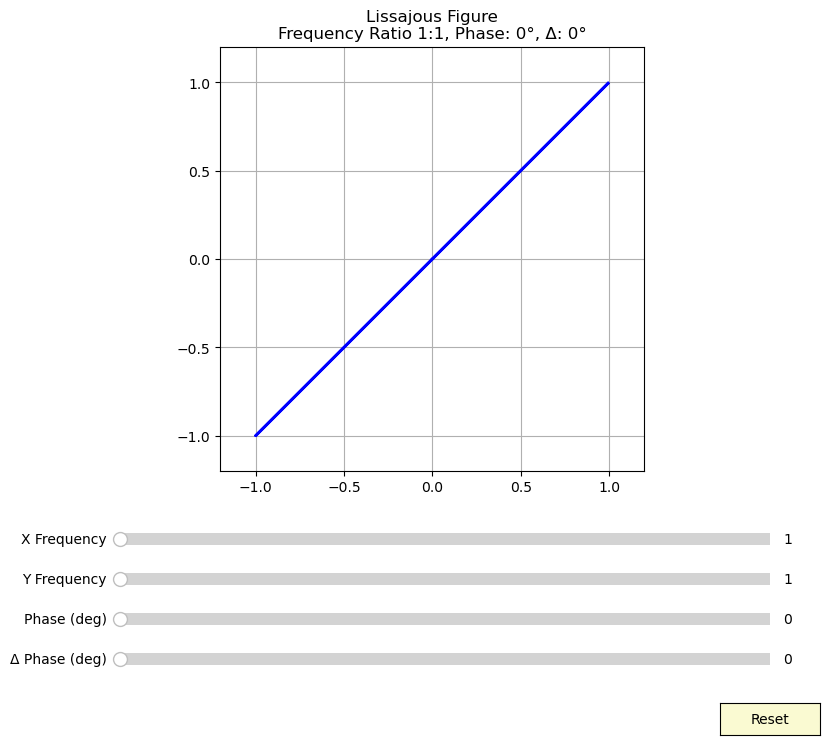

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

def lissajous_curve(ratio_x=1, ratio_y=1, phase=0, delta=0, num_points=10000):
    """
    Generate Lissajous curve coordinates
    
    Parameters:
    ratio_x (float): frequency ratio for x-axis
    ratio_y (float): frequency ratio for y-axis
    phase (float): phase difference in degrees
    delta (float): phase offset in degrees
    num_points (int): number of points to generate
    
    Returns:
    tuple: (x, y) coordinates of the curve
    """
    t = np.linspace(0, 2*np.pi, num_points)
    phase_rad = np.deg2rad(phase)
    delta_rad = np.deg2rad(delta)
    
    x = np.sin(ratio_x * t + delta_rad)
    y = np.sin(ratio_y * t + phase_rad)
    
    return x, y

def update(val):
    """Update the plot when sliders are changed"""
    ratio_x = sx_ratio.val
    ratio_y = sy_ratio.val
    phase = phase_slider.val
    delta = delta_slider.val
    
    x, y = lissajous_curve(ratio_x, ratio_y, phase, delta)
    line.set_data(x, y)
    
    # Update title with current parameters
    ax.set_title(f'Lissajous Figure\nFrequency Ratio {ratio_x}:{ratio_y}, Phase: {phase}°, Δ: {delta}°')
    fig.canvas.draw_idle()

# Create initial plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.35)  # Make room for sliders

# Initial parameters
init_ratio_x = 1
init_ratio_y = 1
init_phase = 0
init_delta = 0

# Generate initial curve
x, y = lissajous_curve(init_ratio_x, init_ratio_y, init_phase, init_delta)
line, = ax.plot(x, y, lw=2, color='blue')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.grid(True)
ax.set_aspect('equal')
ax.set_title(f'Lissajous Figure\nFrequency Ratio {init_ratio_x}:{init_ratio_y}, Phase: {init_phase}°, Δ: {init_delta}°')

# Create sliders
axcolor = 'lightgoldenrodyellow'
ax_ratio_x = plt.axes([0.2, 0.25, 0.65, 0.03], facecolor=axcolor)
ax_ratio_y = plt.axes([0.2, 0.20, 0.65, 0.03], facecolor=axcolor)
ax_phase = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_delta = plt.axes([0.2, 0.10, 0.65, 0.03], facecolor=axcolor)

sx_ratio = Slider(ax_ratio_x, 'X Frequency', 1, 10, valinit=init_ratio_x, valstep=1)
sy_ratio = Slider(ax_ratio_y, 'Y Frequency', 1, 10, valinit=init_ratio_y, valstep=1)
phase_slider = Slider(ax_phase, 'Phase (deg)', 0, 360, valinit=init_phase)
delta_slider = Slider(ax_delta, 'Δ Phase (deg)', 0, 360, valinit=init_delta)

# Register update function with sliders
sx_ratio.on_changed(update)
sy_ratio.on_changed(update)
phase_slider.on_changed(update)
delta_slider.on_changed(update)

# Add reset button
resetax = plt.axes([0.8, 0.02, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    """Reset sliders to initial values"""
    sx_ratio.reset()
    sy_ratio.reset()
    phase_slider.reset()
    delta_slider.reset()
button.on_clicked(reset)

plt.show()